# Introduction to Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state:

   ### __If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.__

We’ve found this to be a pretty good summary of Seaborn’s strengths. In practice, the “well-defined set of hard things” includes:

 -   Using default themes that are aesthetically pleasing.
 -   Setting custom color palettes.
 -   Making attractive statistical plots.
 -   Easily and flexibly displaying distributions.
 -   Visualizing information from matrices and DataFrames.

Those last three points are why Seaborn is our tool of choice for Exploratory Analysis. It makes it very easy to “get to know” your data quickly and efficiently.

However, Seaborn is a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib, and we’ll cover how to do that as well.

### Importing libraries and dataset.

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
df = pd.read_csv('Pokemon.csv', index_col=0)

In [55]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Seaborn's plotting functions.

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a __scatter plot__ is just one line of code using the ```lmplot()``` function.

There are two ways you can do so.

   - The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, ```x=``` and ```y=```.
   - The second way is to directly pass in Series of data to the axes arguments.

For example, let's compare the Attack and Defense stats for our Pokémon:

<Figure size 648x648 with 0 Axes>

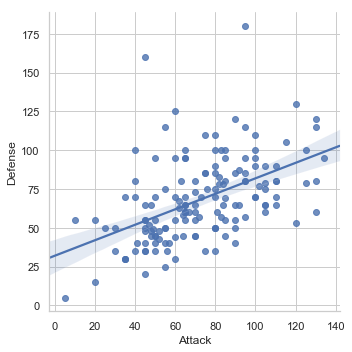

In [86]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the ```lmplot()```:

   - First, we'll set ```fit_reg=False``` to remove the regression line, since we only want a scatter plot.
   - Then, we'll set ```hue='Stage'``` to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.


<Figure size 648x648 with 0 Axes>

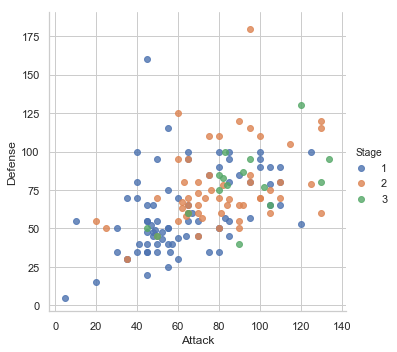

In [85]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

### Customizing with Matplotlib.

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

   - First, invoke your Seaborn plotting function as normal.
   - Then, invoke Matplotlib's customization functions. In this case, we'll use its ```ylim()``` and ```xlim()``` functions.

Here's our new scatter plot with sensible axes limits:

(0, 141.99764013468427)

<Figure size 648x648 with 0 Axes>

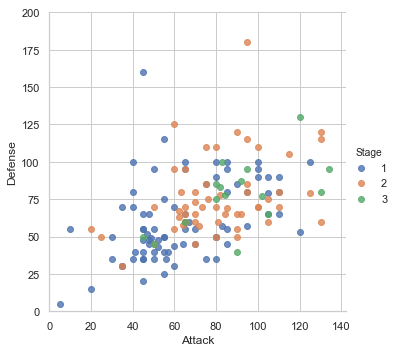

In [84]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, 200)
plt.xlim(0, None)

### The role of Pandas.

Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

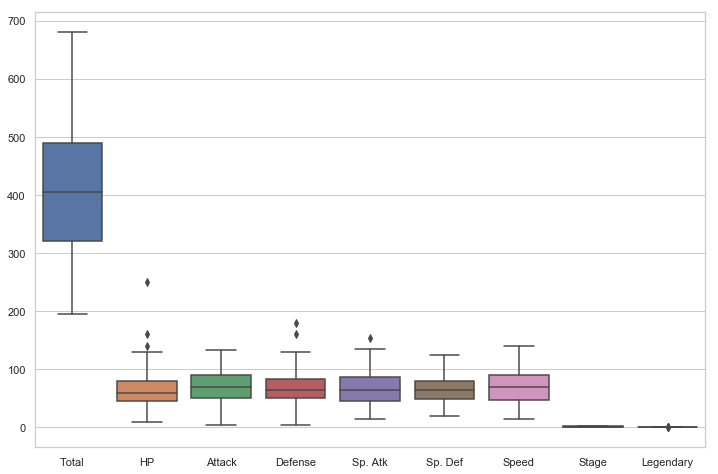

In [80]:
# Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

   - We can remove the Total since we have individual stats.
   - We can remove the Stage and Legendary columns because they aren't combat stats.

In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to __pre-format__ your DataFrame.

Let's create a new DataFrame called ```stats_df``` that only keeps the stats columns:

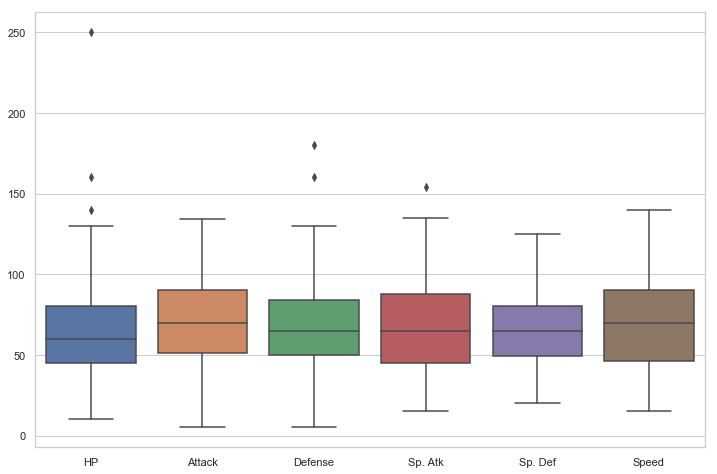

In [79]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Seaborn themes.

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called _'darkgrid'_.

Next, we'll change the theme to _'whitegrid'_ while making a __violin plot__.

   - Violin plots are useful alternatives to box plots.
   - They show the distribution (through the thickness of the violin) instead of only the summary statistics.

For example, we can visualize the distribution of Attack by Pokémon's primary type

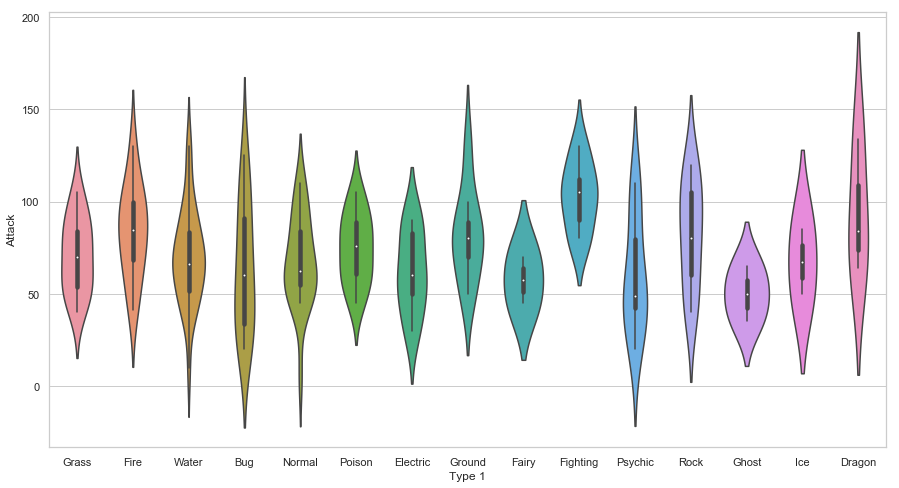

In [73]:
# Set theme
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: _The colors are nonsensical_. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

### Color palettes.

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered __Python list__ of color hex values.

Let's use [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates) to help us create a new color palette:

In [70]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Wonderful. Now we can simply use the ```palette=``` argument to recolor our chart.

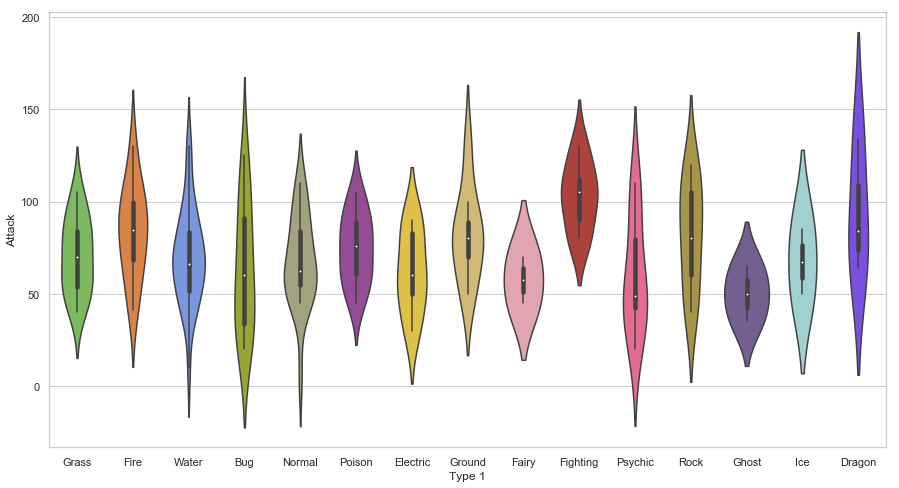

In [75]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Much better!

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the __swarm plot__ comes in. This visualization will show each point, while "stacking" those with similar values:

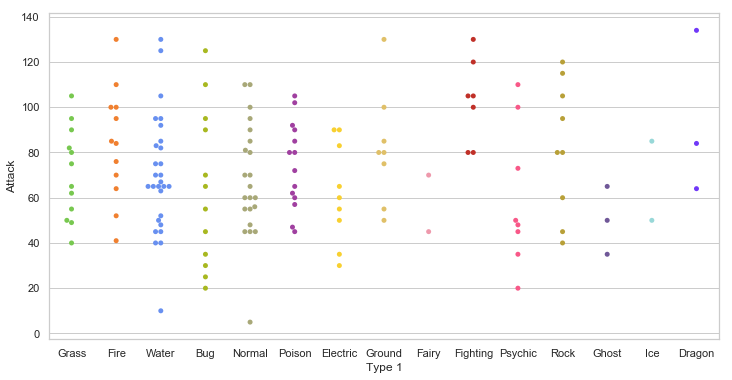

In [93]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

### Overlaying plots.
The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

   - First, we'll make our figure larger using Matplotlib.
   - Then, we'll plot the violin plot. However, we'll set ```inner=None``` to remove the bars inside the violins.
   - Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
   - Finally, we'll set a title using Matplotlib.


Text(0.5, 1.0, 'Attack by Type')

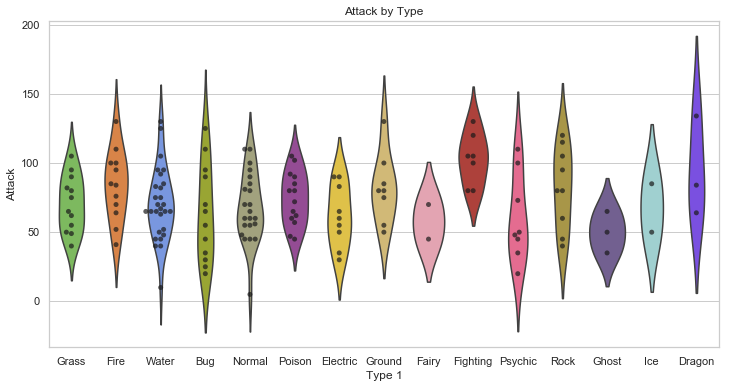

In [95]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

### Putting it all together.
Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

First, here's a reminder of our data format:

In [96]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's ```melt()``` function. It takes 3 arguments:

   - First, the DataFrame to melt.
   - Second, ID variables to keep (Pandas will melt all of the other ones).
   - Finally, a name for the new, melted variable.

Here's the output:

In [97]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...

In [99]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


...you'll find that ```melted_df``` has 6 times the number of rows as ```stats_df```.

Now we can make a swarm plot with ```melted_df```.

   - But this time, we're going to set ```x='Stat'``` and ```y='value'``` so our swarms are separated by stat.
   - Then, we'll set ```hue='Type 1'``` to color our points by the Pokémon type.


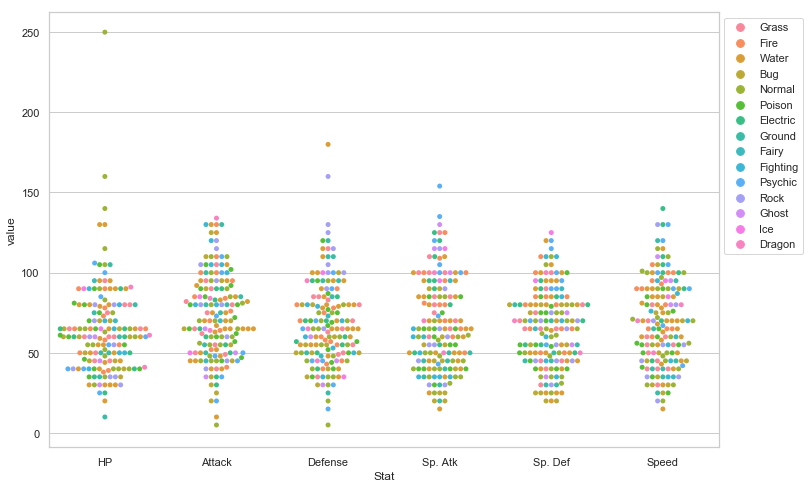

In [128]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:

   - Enlarge the plot.
   - Separate points by hue using the argument ```dodge=True```.
   - Use our custom Pokemon color palette.
   - Adjust the y-axis limits to end at 0.
   - Place the legend to the right.


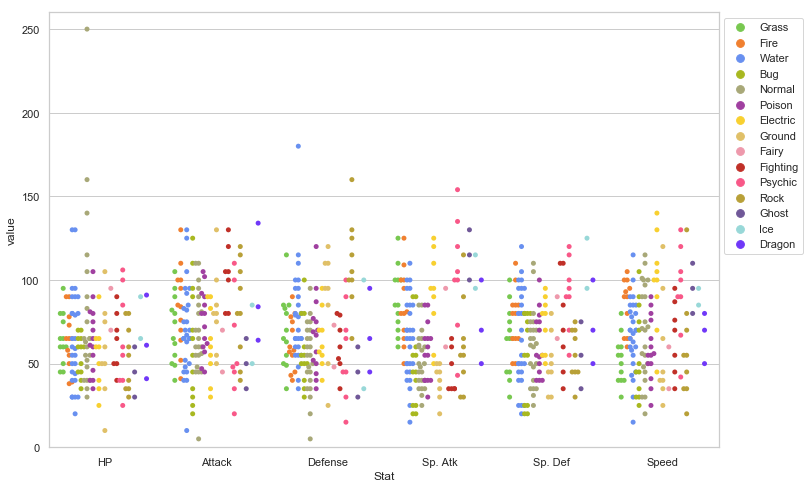

In [137]:
# 1. Enlarge the plot
plt.figure(figsize=(12,8))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### Pokédex (mini-gallery).

We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

#### Heatmap
Heatmaps help you visualize matrix-like data.

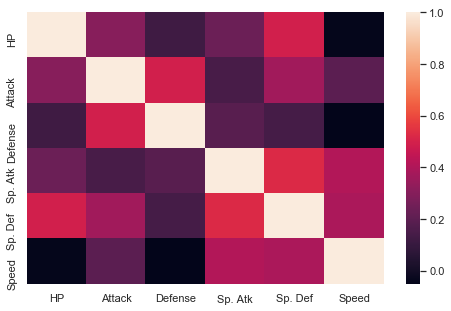

In [135]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

#### Histogram

Histograms allow you to plot the distributions of numeric variables.

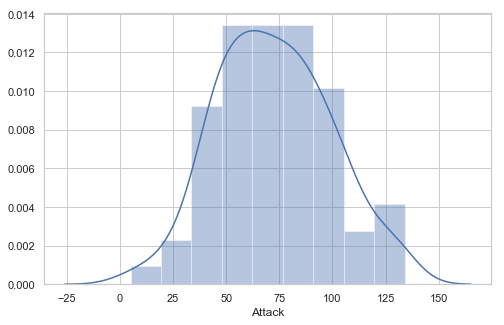

In [134]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

#### Bar Plot

Bar plots help you visualize the distributions of categorical variables.

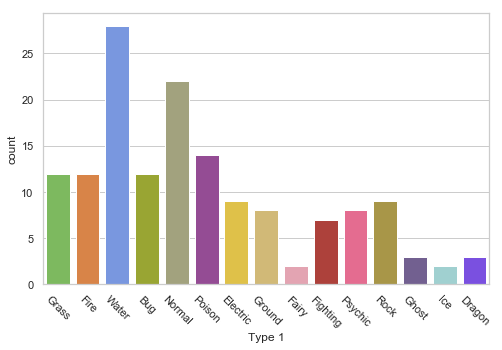

In [139]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45);

#### Factor Plot

Factor plots make it easy to separate plots by categorical classes.

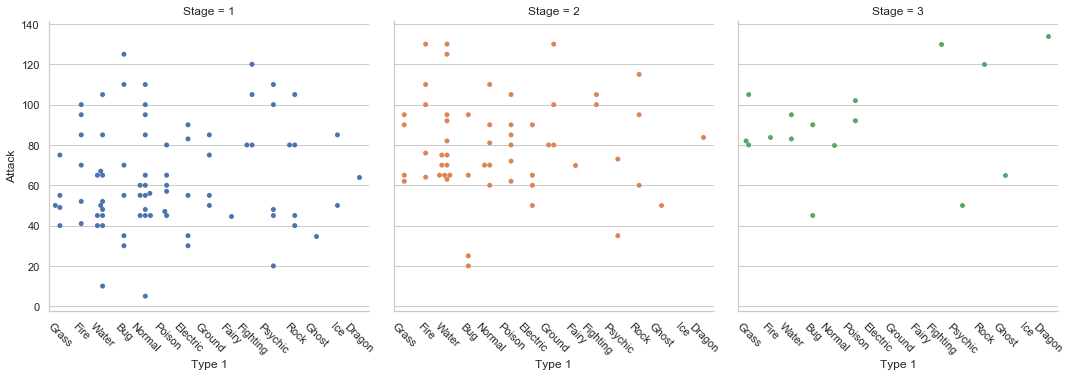

In [146]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# plt.xticks(rotation=-45)Doesn't work because only rotates last plot

#### Density Plot

Density plots display the distribution between two variables.

   - Tip: Consider overlaying this with a scatter plot.


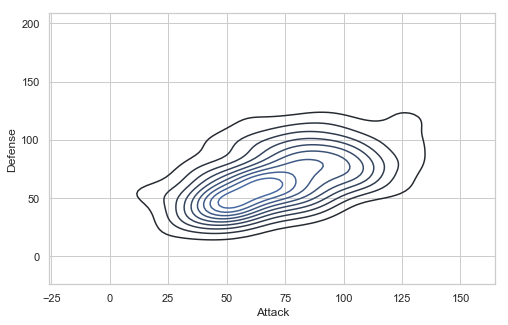

In [147]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

#### Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

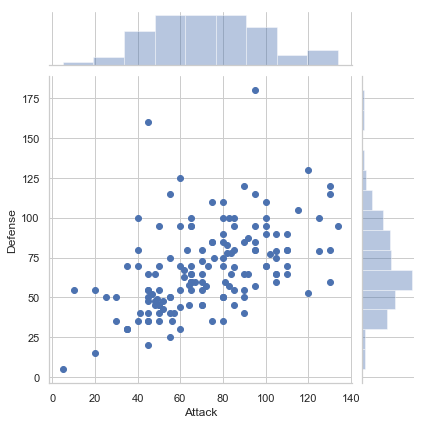

In [149]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

Congratulations... you've made it to the end of this Python Seaborn tutorial!

We've just concluded a tour of key Seaborn paradigms and showed you many examples along the way. Feel free to use this page along with the official [Seaborn gallery](http://seaborn.pydata.org/examples/) as references for your projects going forward.